In [11]:
import os

import numpy as np

import tensorflow as tf
print('tf version = ' + tf.__version__ ) 

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

tf version = 2.6.0


Could replace the image path with my own image folder, will try later

In [12]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

In [13]:
# TF Lite data loader
data = DataLoader.from_folder(image_path) # By default this will shuffle the data
train_data, rest_data = data.split(0.8)
validation_data, test_data = data.split(0.5)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Detailed version : 

0


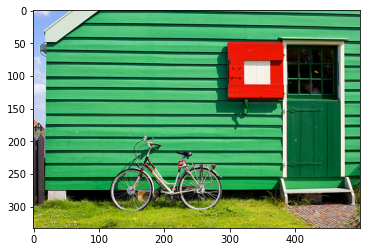

1


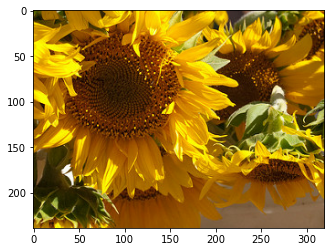

In [14]:
dataframe = data.gen_dataset().unbatch().take(2)
type(dataframe)
for i, (image, label) in enumerate(dataframe):
    print(i)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)
    plt.show()

In [16]:
model = image_classifier.create(train_data, validation_data=validation_data, train_whole_model=True)
model.summary()

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 59s 633ms/step - loss: 0.8659 - accuracy: 0.7668 - val_loss: 0.6535 - val_accuracy: 0.8931
Epoch 2/5
91/91 [==============================] - 56s 616ms/step - loss: 0.6553 - accuracy: 0.8894 - val_loss: 0.6061 - val_accuracy: 0.9287
Epoch 3/5
91/91 [==============================] - 64s 704ms/step - loss: 0.6249 

Evaluation

In [17]:
loss, accuracy = model.evaluate(test_data)

58/58 [==============================] - 30s 500ms/step - loss: 0.5764 - accuracy: 0.9466


How to display the prediction results on the first n (10) test images. 

In [18]:
predicts = model.predict_top_k(test_data)

In [22]:
len(predicts)==len(test_data)

True

In [26]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(10)):
    predict_label = predicts[i][0][0]
    colors = []
    color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
    colors.append(color)
print(colors)

['black']


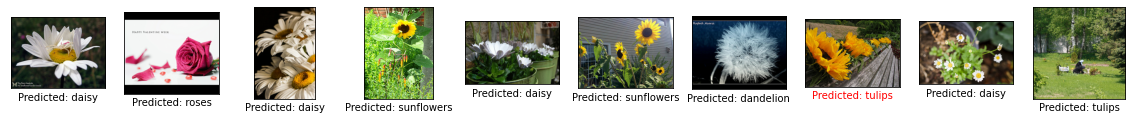

In [28]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(10)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [29]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /var/folders/pj/_64wh_0d44z5f2y6mk2zml0w0000gn/T/tmp26nnm657/assets


INFO:tensorflow:Assets written to: /var/folders/pj/_64wh_0d44z5f2y6mk2zml0w0000gn/T/tmp26nnm657/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /var/folders/pj/_64wh_0d44z5f2y6mk2zml0w0000gn/T/tmpy9g230og/labels.txt


INFO:tensorflow:Saving labels in /var/folders/pj/_64wh_0d44z5f2y6mk2zml0w0000gn/T/tmpy9g230og/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
